In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import scipy as sc
import statsmodels.api as sm
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cp
import pygrib
import cfgrib
import glob
import stormeunice as eun

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)

In [3]:
lon_min = -15
lon_max = 5
lat_min = 45
lat_max = 60

In [4]:
directory = '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/pf/1_2022-02-16.nc'
eps = eun.data.Data.preproc_ds(xr.open_dataset(directory).get(['fg10', 'msl']))

<a list of 14 text.Text objects>

/home/e/ermis/nobackups/miniconda3/envs/storm_eunice39/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


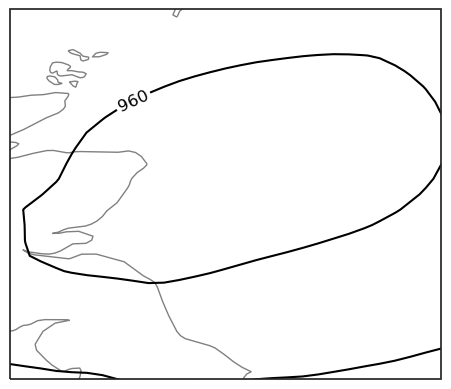

In [5]:
projection = ccrs.PlateCarree()
p_max = 1040
p_min = 960

i = 2
e = 1
experiment = 'curr'
time = '2022-02-18 12'
t = 3
longitude = eps.longitude.values
latitude = eps.latitude.values
test = eps.sel(inidate = '2022-02-16',number = 49, time = time).msl/100
# test = eps_extreme_mean[i+e*3].sel(time = time).msl/100


# figure and map setup
fig = plt.figure(1)
ax = plt.subplot(projection = projection)
ax.set_extent([-4, lon_max-2, 54, lat_max], projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey')

# isobars as contours
clevs_p = np.linspace(p_min, p_max, 5) 
cs = ax.contour(longitude, latitude, test, clevs_p, colors='black',
                transform=projection)
plt.clabel(cs, fmt='%d')

In [14]:
def get_eps_data(experiments, inidate = '2022-02-16'):
    """
    Function to load comlete data of simulations on surface level since xr has a bug that prevents using 
    this as a simpler solution

    Input:
    ------
    experiments: list of strings, list of experiments to import, e.g. ['pi', 'curr', 'incr']

    Output:
    -------
    eps: list of xarrays, data and metadata of operational forecasts, each list entry is one experiment
    """


    directory = {'pi':'/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/sfc/',
                'curr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/',
                'incr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/sfc/'}

    eps = {}
    for experiment in experiments:
        exp_eps = []
        for c, cont in enumerate(['cf', 'pf']):
            for files in glob.glob(directory[experiment]+cont+'/*'+inidate+'*.nc'):
                print(files)
                data = xr.open_dataset(files)
                exp_eps.append(eun.data.Data.preproc_ds(data.get(['fg10', 'msl'])))  # preprocessing just two variables for speed

        eps[experiment] = xr.concat(exp_eps, dim = 'number').squeeze()

    return eps

In [15]:
eps = get_eps_data(['curr'], inidate = '2022-02-14')

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/cf/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/pf/1_2022-02-14.nc


<a list of 7 text.Text objects>

/home/e/ermis/nobackups/miniconda3/envs/storm_eunice39/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


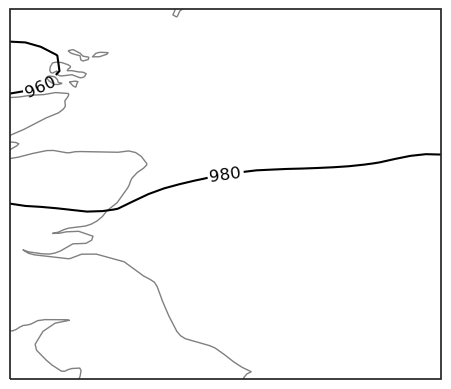

In [16]:
projection = ccrs.PlateCarree()
p_max = 1040
p_min = 960

i = 2
e = 1
experiment = 'curr'
time = '2022-02-18T12'
t = 3
longitude = eps[experiment].longitude.values
latitude = eps[experiment].latitude.values
test = eps[experiment].sel(number = 49, time = time).msl/100
# test = eps_extreme_mean[i+e*3].sel(time = time).msl/100


# figure and map setup
fig = plt.figure(1)
ax = plt.subplot(projection = projection)
ax.set_extent([-4, lon_max-2, 54, lat_max], projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey')

# isobars as contours
clevs_p = np.linspace(p_min, p_max, 5) 
cs = ax.contour(longitude, latitude, test, clevs_p, colors='black',
                transform=projection)
plt.clabel(cs, fmt='%d')